In [33]:
import numpy as np
import json, os
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json
import numpy as np

In [36]:
data = {} #data[(mps,cr,nmlp)]:mpjpe

input_n = 10

#combinations of hyperparameters
message_passing_steps = [1, 5, 10, 12]
connectivity_radius = [0, 500, 1000, np.inf]
nmlp_layers = [2, 3]

# Opening JSON file
#change the name of the path to the final dictionary

missing = 0
not_completed = 0
existing_tuple = []

for mps in message_passing_steps:
    for cr in connectivity_radius:
        for nl in nmlp_layers:
            try:
                with open(f'checkpoints/loss_input_{input_n}_mps_{mps}_cr_{cr}_nl_{nl}.json') as json_file:
                    d = json.load(json_file)
                if len(d['val_mpjperror']) == 50:
                    data[(mps, cr, nl)] = np.mean(d['val_mpjperror'][-4:])
                    existing_tuple.append((mps, cr, nl))
                else:
                    not_completed += 1
            except:
                 missing += 1

if missing > 0:
    print(f'{missing} files not found, {not_completed} not completed.')

#find the best combination
min_mpjpe = np.inf
for mps, cr, nl in existing_tuple:
    if data[(mps, cr, nl)] < min_mpjpe:
        best_param = (mps,cr,nl)
        min_mpjpe = data[(mps,cr,nl)]
        
best_mps, best_cr, best_nl = best_param
        
print('best hyperparameters: ', best_param)

5 files not found, 1 not completed.
best hyperparameters:  (10, 500, 2)


In [37]:
data

{(1, 0, 2): 86.72919334756314,
 (1, 0, 3): 84.44817235859125,
 (1, 500, 2): 81.41199306296691,
 (1, 500, 3): 91.49918845606545,
 (1, 1000, 2): 80.7663175916044,
 (1, 1000, 3): 88.15418890074707,
 (1, inf, 2): 82.75003779793667,
 (1, inf, 3): 81.09611125933831,
 (5, 0, 2): 81.12936010316614,
 (5, 0, 3): 81.14835912486659,
 (5, 500, 2): 79.22815723941657,
 (5, 500, 3): 81.69180674137317,
 (5, 1000, 2): 79.53073861615084,
 (5, 1000, 3): 85.67603610814656,
 (5, inf, 2): 82.40071816079687,
 (5, inf, 3): 85.88412931341159,
 (10, 0, 2): 83.14084178228389,
 (10, 0, 3): 83.51847207399503,
 (10, 500, 2): 76.67531572394165,
 (10, 500, 3): 84.30882915332622,
 (10, 1000, 2): 80.50897589825685,
 (10, 1000, 3): 84.10156305585201,
 (10, inf, 2): 82.1315679473497,
 (10, inf, 3): 83.77132470651014,
 (12, 0, 2): 84.64727632515118,
 (12, 0, 3): 81.37104678050517}

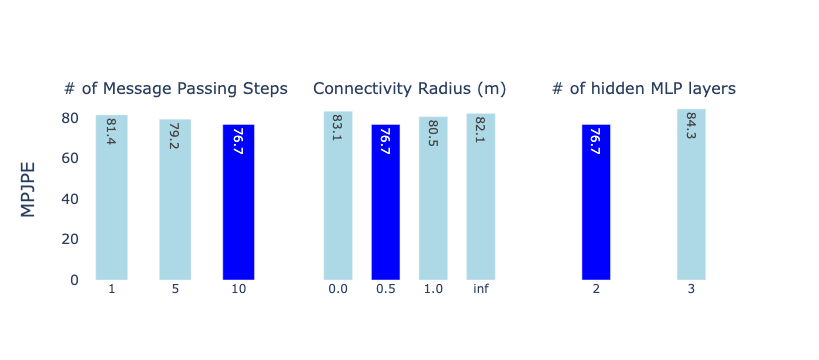

In [42]:
color1 = 'lightblue'
color2 = 'blue'

####### PLOT MPS ############

existing_mps = sorted(list(set([m for m, _, _ in existing_tuple])))
mps_losses = []
for mps in np.sort(existing_mps):
    if (mps, best_cr, best_nl) in data:
        mps_losses.append(data[(mps, best_cr, best_nl)])

best_mps_index = existing_mps.index(best_mps)

colors = [color1]*len(existing_mps)

colors[best_mps_index] = color2


fig  = make_subplots(rows=1, cols=3,
                    shared_yaxes=True,
                    vertical_spacing=0.02,
                    subplot_titles=("# of Message Passing Steps","Connectivity Radius (m)", "# of hidden MLP layers"))


fig.add_trace(go.Bar(x= [str(mps) for mps in existing_mps], 
                     y= [loss for loss in mps_losses],
                    marker_color=colors,
                     name = 'other options',
                     showlegend=False,
                     width = 0.5,
                      text=[round(i,1) for i in mps_losses]
                    ), row=1, col=1)



####### PLOT CR ############

existing_cr = sorted(list(set([r for _, r, _ in existing_tuple])))
cr_losses = []
for cr in existing_cr:
    if (best_mps, cr, best_nl) in data:
        cr_losses.append(data[(best_mps, cr, best_nl)])

best_cr_index = existing_cr.index(best_cr)

colors = [color1]*len(existing_cr)

colors[best_cr_index] = color2


fig.add_trace(go.Bar(x= [str(i/1000) for i in connectivity_radius], 
                     y= [loss for loss in cr_losses],
                    marker_color=colors,
                     name = 'other option',
                     showlegend=False,
                     width = 0.6,
                      text=[round(i,1) for i in cr_losses]
                    ), row=1, col=2)



####### PLOT NMLP ############
best_nl_index = nmlp_layers.index(best_nl)

existing_nl = sorted(list(set([n for _, _, n in existing_tuple])))
nl_losses = []
for nl in existing_nl:
    if (best_mps, best_cr, nl) in data:
        nl_losses.append(data[(best_mps, best_cr, nl)])

best_nl_index = existing_nl.index(best_nl)
    
colors = [color1]*len(existing_nl)

colors[best_nl_index] = color2

fig.add_trace(go.Bar(x= [str(i) for i in existing_nl], 
                     y= [loss for loss in nl_losses],
                    marker_color=colors,
                     name = 'other option',
                     showlegend=False,
                     width = 0.3,
                      text=[round(i,1) for i in nl_losses]
                    ), row=1, col=3)



fig.update_layout(
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='MPJPE',
        titlefont_size=18,
        tickfont_size=14,
    ),
    autosize=False,
    width=900,
    height=300,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()
